##**ASSIGNMMENT - 3**
## PRANAV BALAJI R S - 21BAI1893
###VIT CHENNAI

##1. Downloading the Dataset and necessary libraries

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sn

##2. Load the Dataset into the tool

In [ ]:
data = pd.read_csv("/content/penguins_size.csv")

In [ ]:
df = pd.DataFrame(data)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##3. Performing Visualization Operations

###Univariate Analysis

In [ ]:
columns = df.columns

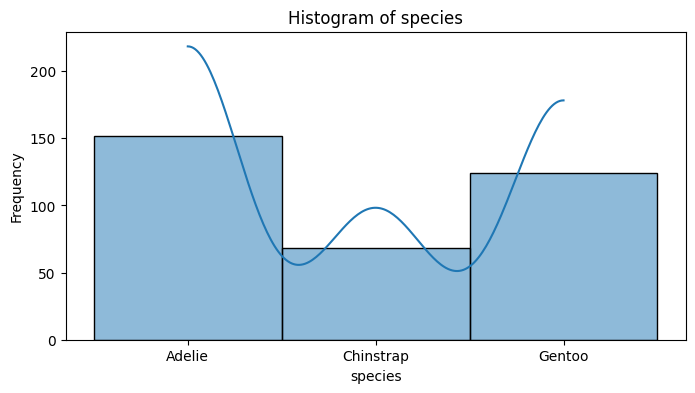

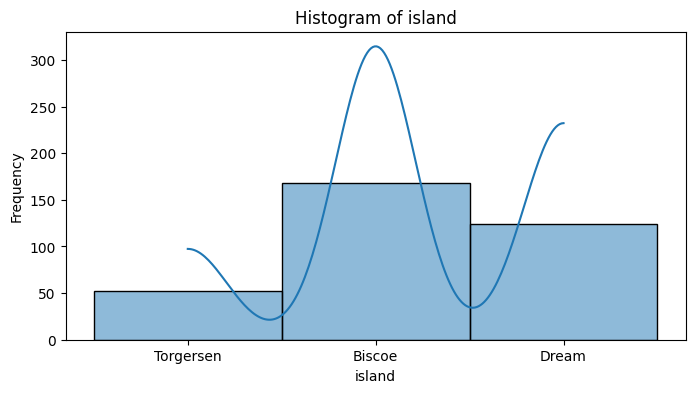

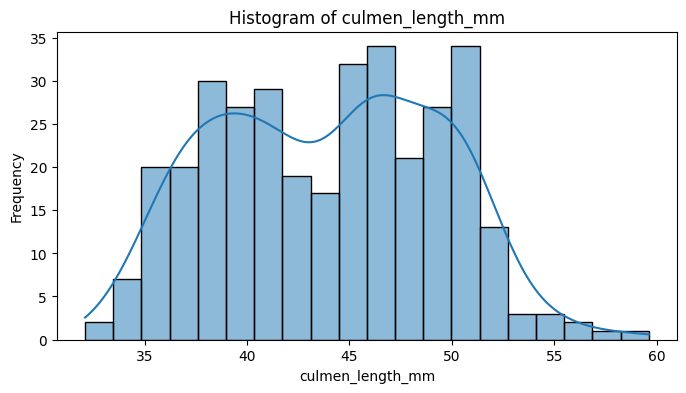

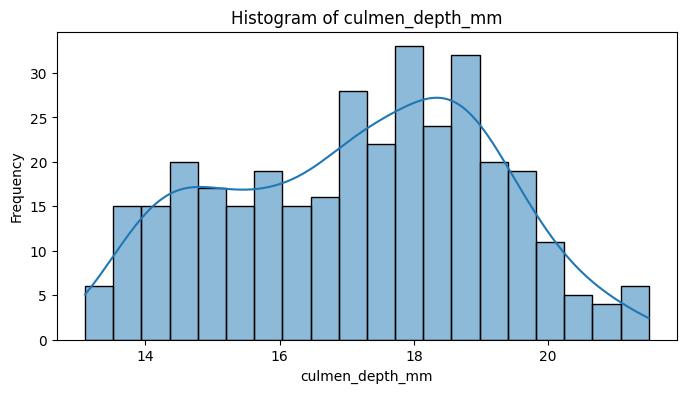

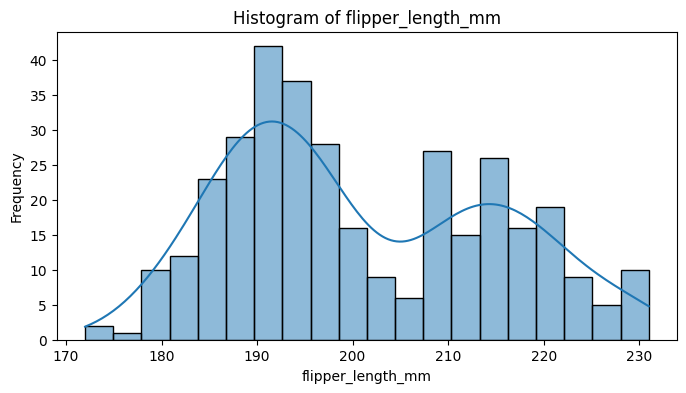

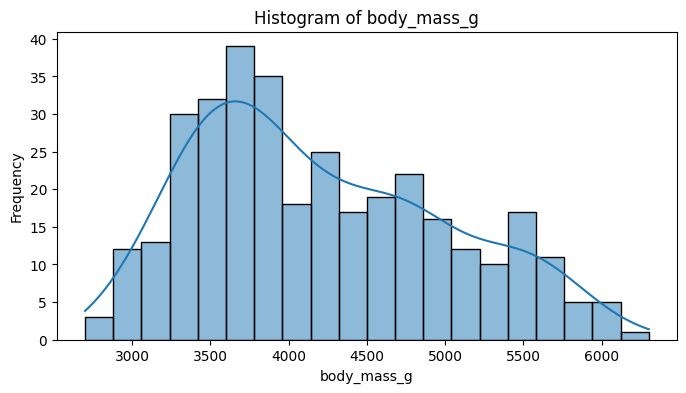

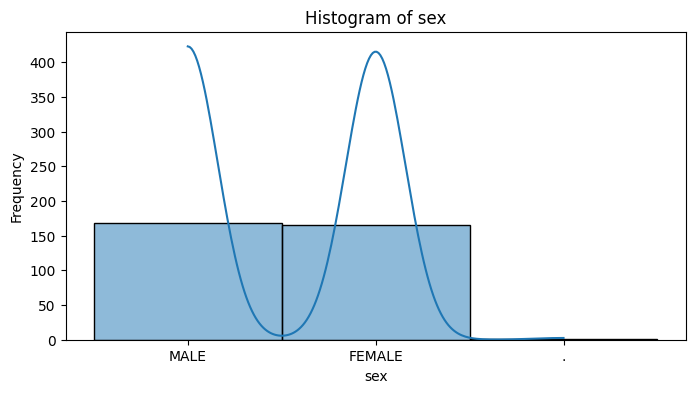

In [ ]:
for column in columns:
    plt.figure(figsize=(8, 4))
    sn.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

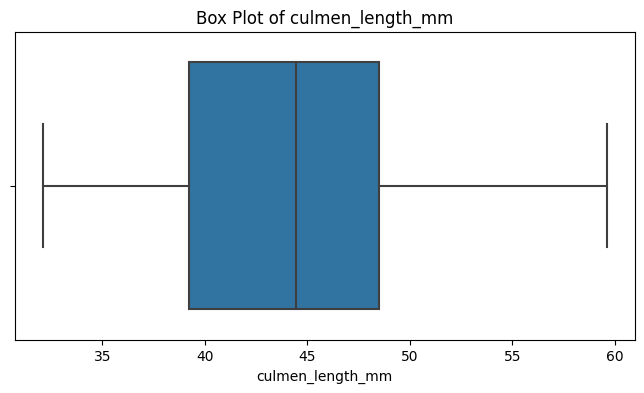

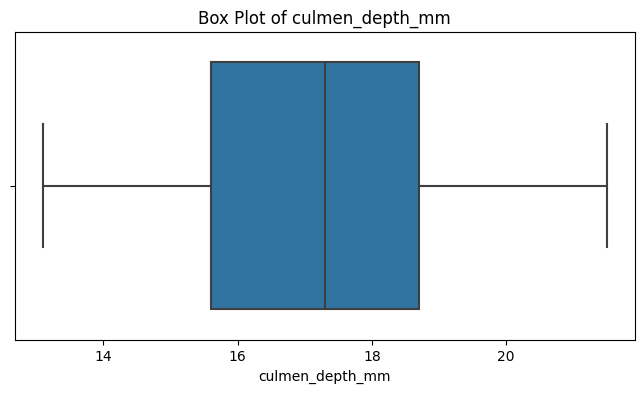

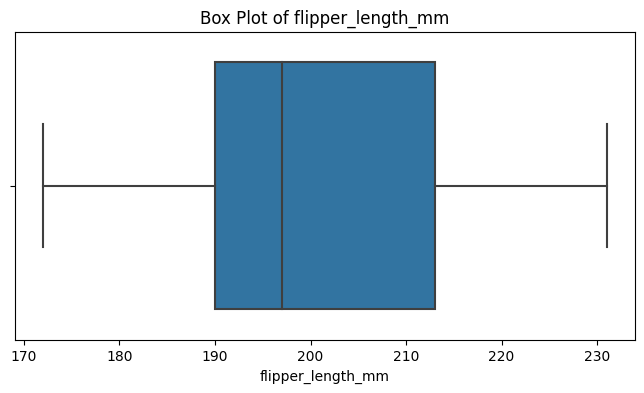

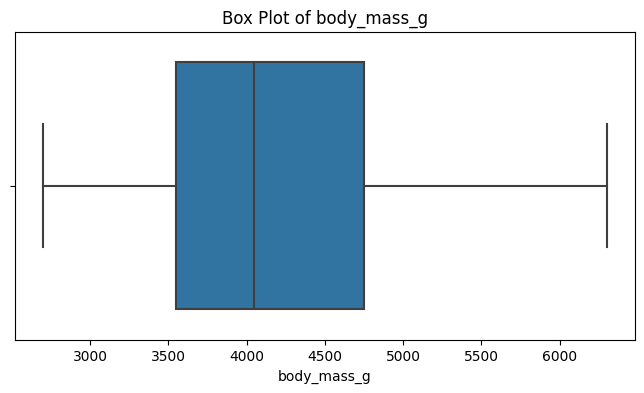

In [ ]:
for column in ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]:
    plt.figure(figsize=(8, 4))
    sn.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

###Bivariate Analysis

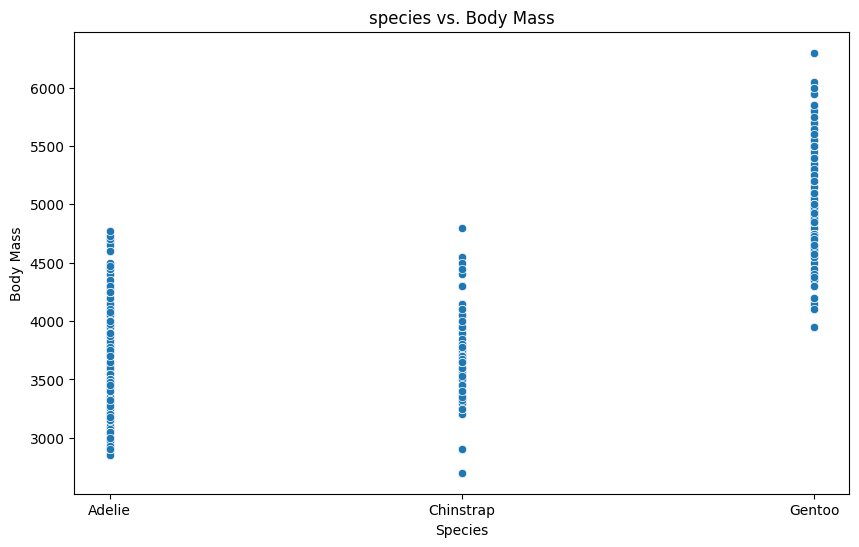

In [ ]:
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df, x='species', y='body_mass_g')
plt.title('species vs. Body Mass')
plt.xlabel('Species')
plt.ylabel('Body Mass')
plt.show()

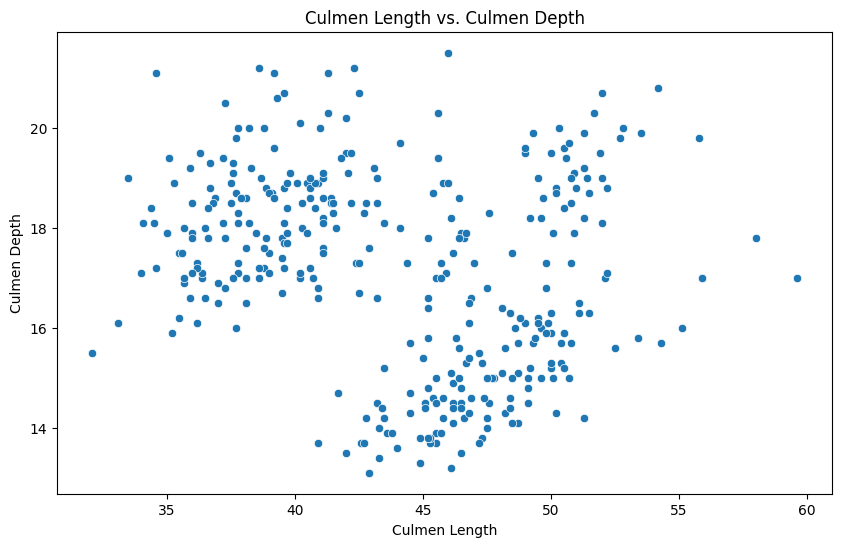

In [ ]:
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm')
plt.title('Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')
plt.show()

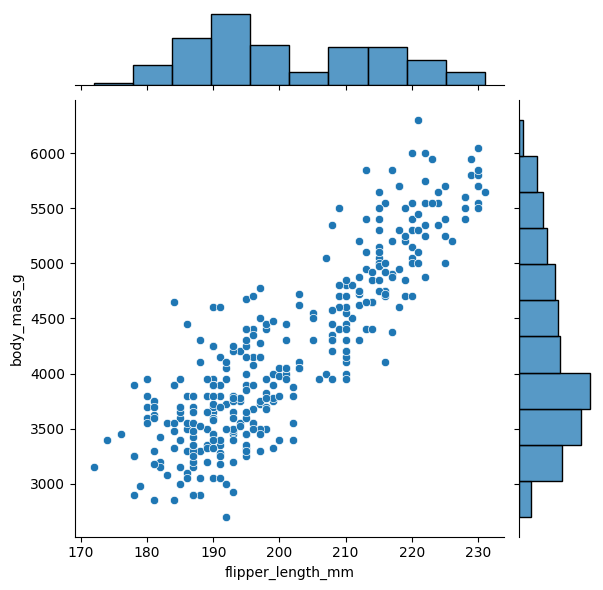

In [ ]:
sn.jointplot(x='flipper_length_mm', y='body_mass_g', data=df, kind='scatter')
plt.show()

###Multivariate Analysis

<ipython-input-117-448166288404>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


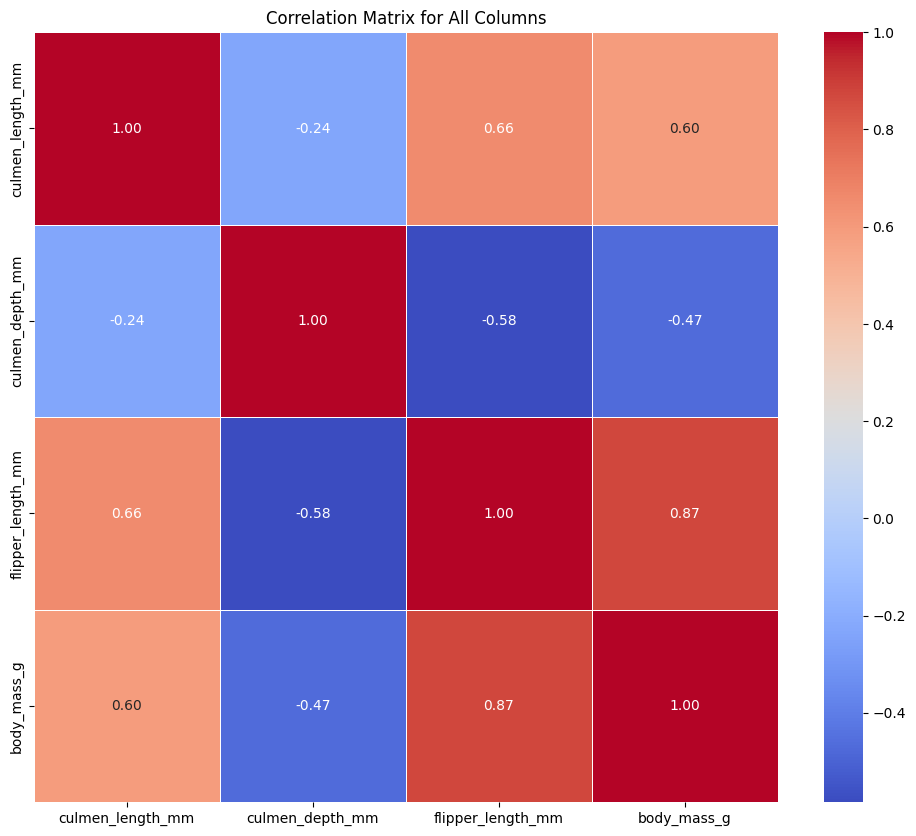

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Columns')
plt.show()

##4. Descriptive Statistics

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

##5. Checking the Missing Values

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df = df.dropna()

##6. Find out the outliers and replace them

In [ ]:
Q1 = df['culmen_length_mm'].quantile(0.25)
Q3 = df['culmen_length_mm'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['culmen_length_mm'] < Q1 - 1.5 * IQR) | (df['culmen_length_mm'] > Q3 + 1.5 * IQR)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


In [ ]:
Q1 = df['culmen_depth_mm'].quantile(0.25)
Q3 = df['culmen_depth_mm'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['culmen_depth_mm'] < Q1 - 1.5 * IQR) | (df['culmen_depth_mm'] > Q3 + 1.5 * IQR)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


In [ ]:
Q1 = df['flipper_length_mm'].quantile(0.25)
Q3 = df['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['flipper_length_mm'] < Q1 - 1.5 * IQR) | (df['flipper_length_mm'] > Q3 + 1.5 * IQR)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


In [ ]:
Q1 = df['body_mass_g'].quantile(0.25)
Q3 = df['body_mass_g'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['body_mass_g'] < Q1 - 1.5 * IQR) | (df['body_mass_g'] > Q3 + 1.5 * IQR)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


##8. Check for categorical columns and perform encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])
df["island_encoded"] = label_encoder.fit_transform(df["island"])
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])


<ipython-input-128-8469cea0125f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species_encoded'] = label_encoder.fit_transform(df['species'])
<ipython-input-128-8469cea0125f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["island_encoded"] = label_encoder.fit_transform(df["island"])
<ipython-input-128-8469cea0125f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
df.drop("species", axis=1, inplace=True)
df.drop("island", axis=1, inplace=True)
df.drop("sex", axis=1, inplace=True)

<ipython-input-129-98aa74f2f4a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("species", axis=1, inplace=True)
<ipython-input-129-98aa74f2f4a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("island", axis=1, inplace=True)
<ipython-input-129-98aa74f2f4a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("sex", axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   species_encoded    334 non-null    int64  
 5   island_encoded     334 non-null    int64  
 6   sex_encoded        334 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.9 KB


##7. Check the correlation of Independent variables with the target

In [ ]:
columns = df.columns

In [ ]:
for column in df.columns:
    column_length = len(df[column])
    print(f"Length of {column}: {column_length}")

Length of culmen_length_mm: 334
Length of culmen_depth_mm: 334
Length of flipper_length_mm: 334
Length of body_mass_g: 334
Length of species_encoded: 334
Length of island_encoded: 334
Length of sex_encoded: 334


In [ ]:
import numpy as np
from scipy.stats import pearsonr

for column in columns:
  correlation_coefficient, p_value = pearsonr(df[column], df['species_encoded'])
  print(f"Correlation Coefficient {column} with target: {correlation_coefficient}")
  print(f"P-Value {column} with target: {p_value}")

Correlation Coefficient culmen_length_mm with target: 0.7292617650650444
P-Value culmen_length_mm with target: 1.1618188889171958e-56
Correlation Coefficient culmen_depth_mm with target: -0.7408033691989285
P-Value culmen_depth_mm with target: 2.4957675299169797e-59
Correlation Coefficient flipper_length_mm with target: 0.8513508175376405
P-Value flipper_length_mm with target: 4.926632286499149e-95
Correlation Coefficient body_mass_g with target: 0.7510200974706066
P-Value body_mass_g with target: 8.203390044985856e-62
Correlation Coefficient species_encoded with target: 0.9999999999999999
P-Value species_encoded with target: 0.0
Correlation Coefficient island_encoded with target: -0.6235949164579822
P-Value island_encoded with target: 2.199005741127078e-37
Correlation Coefficient sex_encoded with target: -1.734723475976807e-18
P-Value sex_encoded with target: 0.9999999999999987


##9. Split the data into dependent and independent variables

In [ ]:
# X - Independent variables
# y - Dependent Variable
X = df[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","island_encoded","sex_encoded"]]
y = df[["species_encoded"]]

##10. Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

##11. Split the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

##12. Check the training and testing data shape

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(233, 6) (101, 6) (233, 1) (101, 1)
